### Que: Build a recommender system by using cosine simillarties score.


In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("Book3.csv")
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [15]:
df.drop_duplicates(inplace = True)

In [16]:
user_df= df.pivot_table(index='User.ID', 
                        columns='Book.Title', 
                        values='Book.Rating', fill_value=0)
user_df.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [18]:
user_sim=1-pairwise_distances(user_df.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
user_1=df[df['User.ID']==9]
user_1

,Unnamed: 0,User.ID,Book.Title,Book.Rating
2406,2407,9,The Book of Kells: Selected Plates in Full Color,6


In [21]:
user_2=df[df['User.ID']==160]
user_2

,Unnamed: 0,User.ID,Book.Title,Book.Rating
2480,2481,160,Creative Visualization: Use the Power of Your ...,6
2481,2482,160,"Way of the Peaceful Warrior, 20th Anniversary ...",8
2482,2483,160,Running from Safety: An Adventure of the Spirit,7
2483,2484,160,The Bridge Across Forever,8
2484,2485,160,A Gift of Wings,7
2485,2486,160,One,8


In [22]:
book_read_by_user1 = list(set(user_1['Book.Title']))
book_read_by_user2 = list(set(user_2['Book.Title']))

for Book_Title in book_read_by_user1  :
    if Book_Title not in book_read_by_user2:
        print("Recommendation:",Book_Title) 

Recommendation: The Book of Kells: Selected Plates in Full Color


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer = CountVectorizer(stop_words='english')
book_matrix = vectorizer.fit_transform(df['Book.Title'])

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(book_matrix, book_matrix)

In [43]:
def get_recommendations_with_scores(book_title, cosine_similarities, books):
    book_index =df.index[df['Book.Title'] == book_title].tolist()[0]
    similar_books = list(enumerate(cosine_similarities[book_index]))
    similar_books = sorted(similar_books, key=lambda x: x[1], reverse=True)
    top_similar_books = similar_books[1:6] 
    recommendations = [(df['Book.Title'][i[0]], i[1]) for i in top_similar_books]
    return recommendations

In [47]:
book_title = 'The Da Vinci Code'
recommendations_with_scores = get_recommendations_with_scores(book_title, cosine_similarities, df)

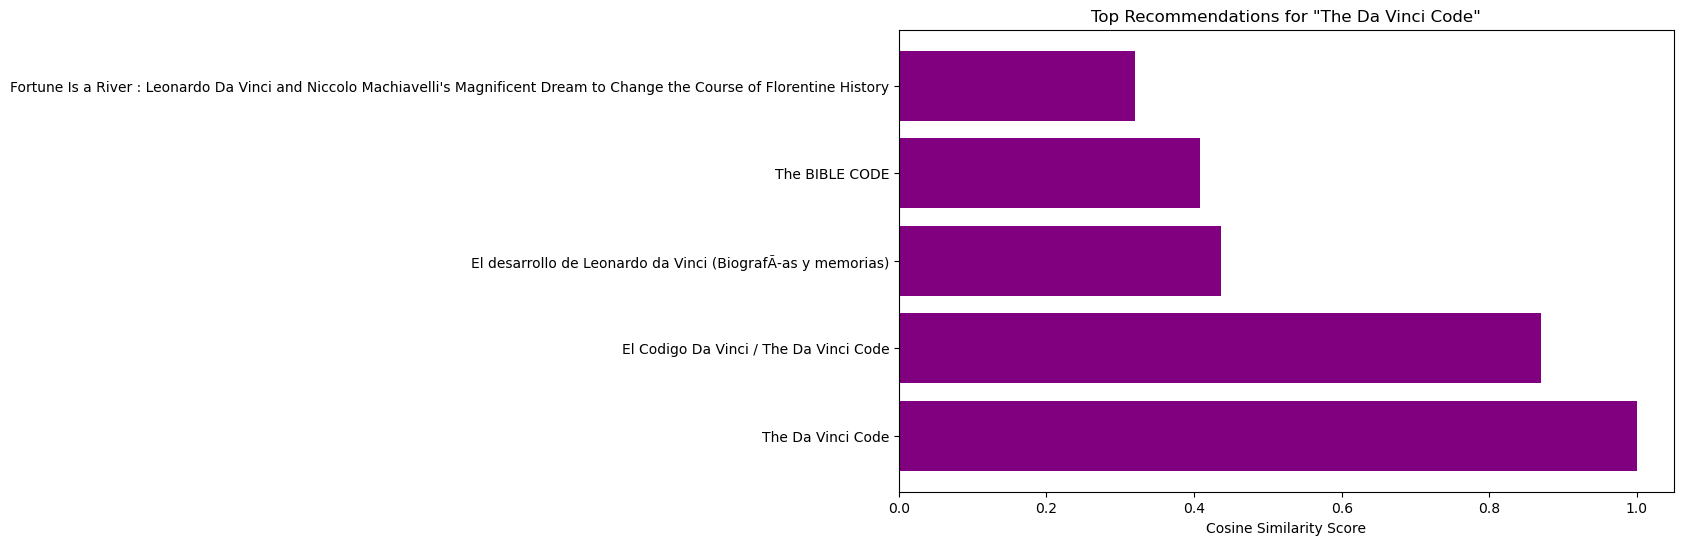

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
books, scores = zip(*recommendations_with_scores)
plt.barh(books, scores, color='purple')
plt.xlabel('Cosine Similarity Score')
plt.title(f'Top Recommendations for "{book_title}"')
plt.show()